In [1]:
## Connect colab with google drive
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import numpy as np
import glob
import pandas as pd
import os

In [3]:
p_train="/content/drive/MyDrive/audio dataset/cats_dogs/train"
p_test = "/content/drive/MyDrive/audio dataset/cats_dogs/test"

In [5]:
data_train = list(glob.glob(p_train+'/**/*.wav'))
data_test = list(glob.glob(p_test+'/**/*.wav'))

In [6]:
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))
file_path = pd.Series(data_train, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
data = pd.concat([file_path, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,File_Path,Labels
0,/content/drive/MyDrive/audio dataset/cats_dogs...,cat
1,/content/drive/MyDrive/audio dataset/cats_dogs...,dog
2,/content/drive/MyDrive/audio dataset/cats_dogs...,cat
3,/content/drive/MyDrive/audio dataset/cats_dogs...,dog
4,/content/drive/MyDrive/audio dataset/cats_dogs...,cat


In [7]:
data["Labels"].value_counts()

cat    125
dog     85
Name: Labels, dtype: int64

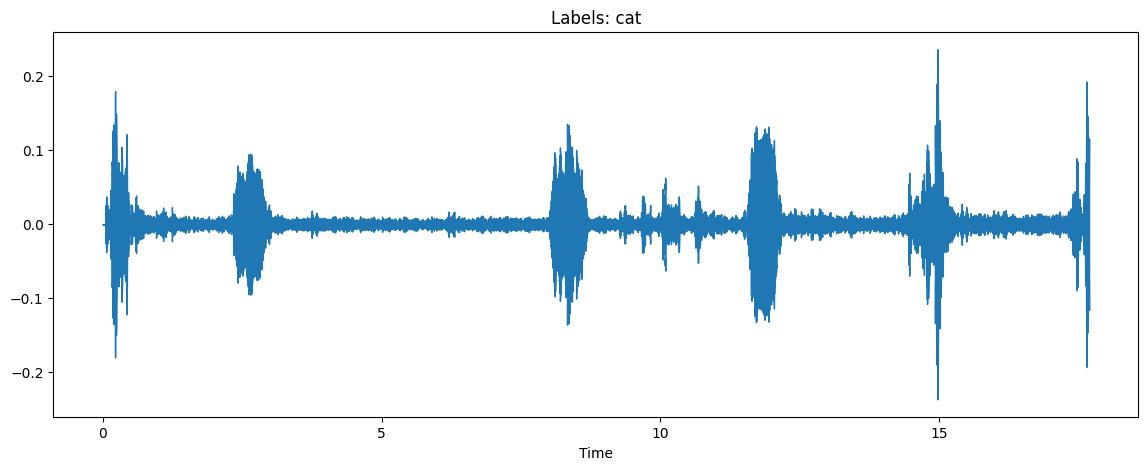

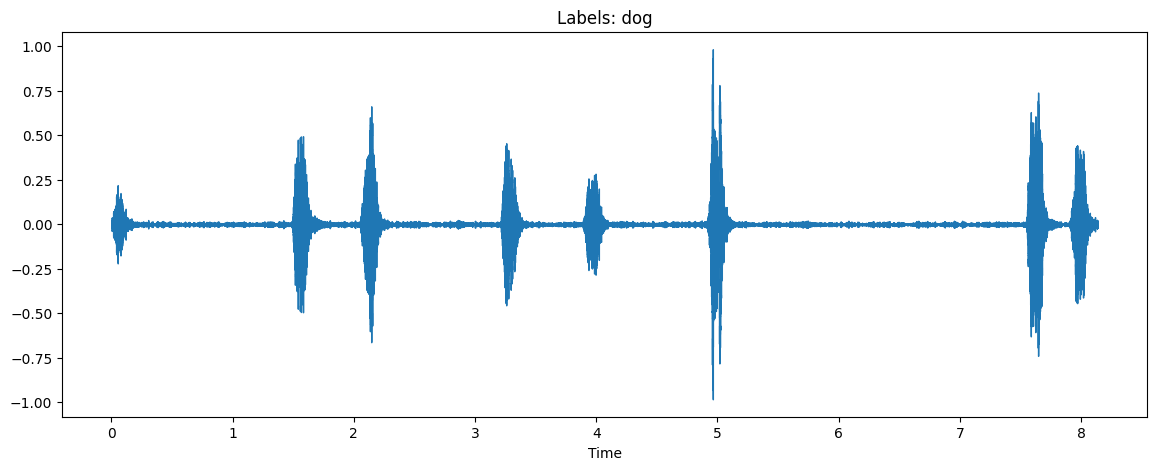

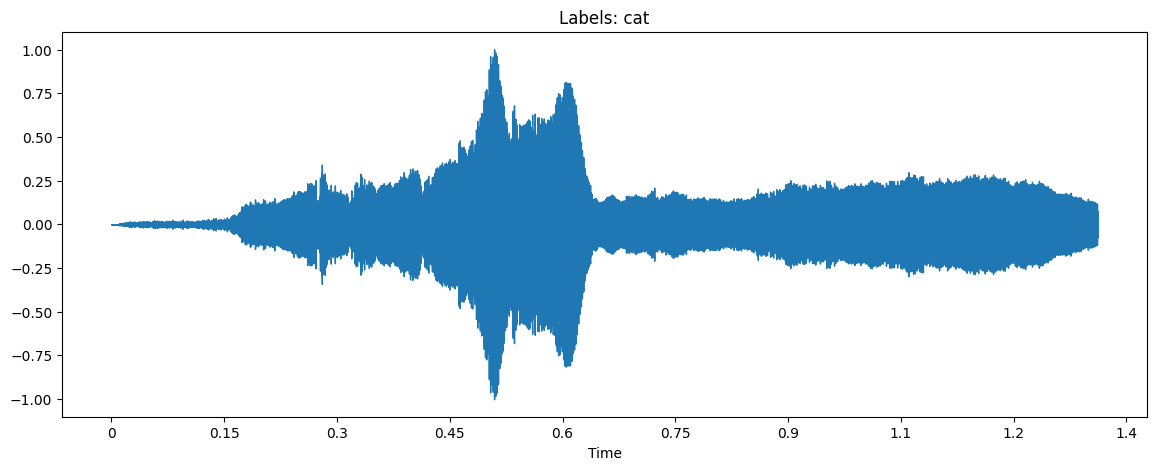

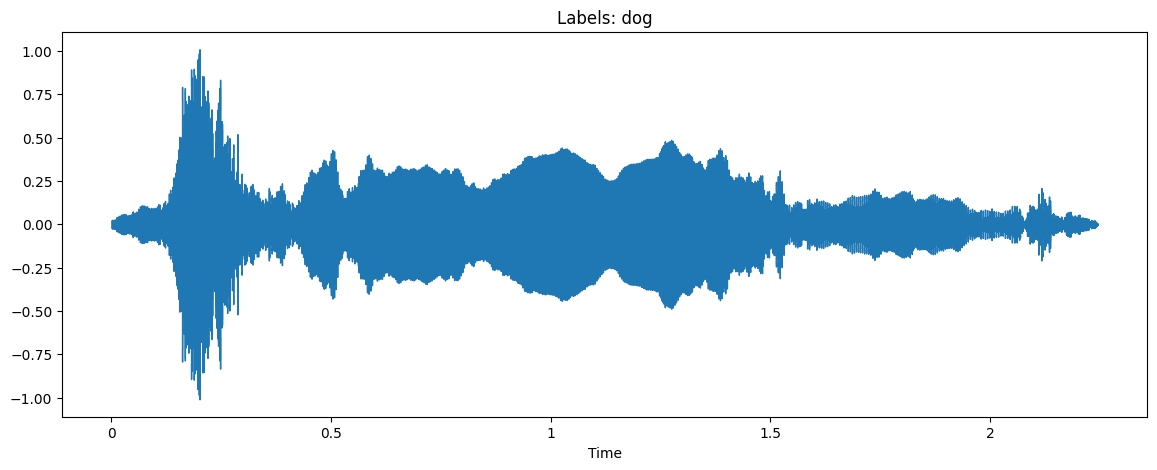

In [8]:
for i in range(4):
    x, sr = librosa.load(data.File_Path[i])
    plt.figure(figsize=(14,5))
    plt.title('Labels: '+str(data['Labels'][i]))
    librosa.display.waveshow(x, sr=sr)
    ipd.Audio(data.File_Path[i])

In [9]:
ipd.Audio(data.File_Path[1])

In [11]:
ipd.Audio(data.File_Path[29])

In [13]:
def feature_extract(file):
    audio, sample_rate = librosa.load(file)
    mfcc_feature = librosa.feature.mfcc(y=audio,sr = sample_rate, n_mfcc=40)
    mfcc_scaled_feature = np.mean(mfcc_feature.T,axis=0)
    return mfcc_scaled_feature

In [14]:
features = []
for index, row in data.iterrows():
    file_name = str(row['File_Path'])
    class_label = row["Labels"]
    data_ = feature_extract(file_name)
    features.append([data_, class_label])

In [15]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf.head()

,feature,class_label
0,"[-446.70547, 107.62539, 7.108902, 10.62403, 10...",cat
1,"[-416.85425, 118.80295, 19.705969, 13.507, 9.5...",dog
2,"[-294.83267, 120.67358, -85.18603, -42.795124,...",cat
3,"[-299.71667, 159.68033, -25.782171, -17.947775...",dog
4,"[-300.07602, 113.56892, -15.277362, 16.353388,...",cat


In [16]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

In [17]:
print(X.shape,y.shape)

(210, 40) (210,)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout

In [19]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [22]:
model = Sequential()
model.add(Dense(64, input_dim=40,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 46)                2990      
                                                                 
 dropout_1 (Dropout)         (None, 46)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1504      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

In [46]:
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [49]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=30)

Epoch 1/30
6/6 [==============================] - 0s 65ms/step - loss: 0.2904 - accuracy: 0.8631 - val_loss: 0.3361 - val_accuracy: 0.8810
Epoch 2/30
6/6 [==============================] - 0s 29ms/step - loss: 0.3066 - accuracy: 0.8869 - val_loss: 0.3255 - val_accuracy: 0.9048
Epoch 3/30
6/6 [==============================] - 0s 30ms/step - loss: 0.2516 - accuracy: 0.8988 - val_loss: 0.3189 - val_accuracy: 0.9048
Epoch 4/30
6/6 [==============================] - 0s 31ms/step - loss: 0.2312 - accuracy: 0.9048 - val_loss: 0.3177 - val_accuracy: 0.9048
Epoch 5/30
6/6 [==============================] - 0s 23ms/step - loss: 0.2472 - accuracy: 0.9107 - val_loss: 0.3214 - val_accuracy: 0.9048
Epoch 6/30
6/6 [==============================] - 0s 15ms/step - loss: 0.2879 - accuracy: 0.8750 - val_loss: 0.3235 - val_accuracy: 0.9048
Epoch 7/30
6/6 [==============================] - 0s 8ms/step - loss: 0.2083 - accuracy: 0.9286 - val_loss: 0.3231 - val_accuracy: 0.9048
Epoch 8/30
6/6 [============

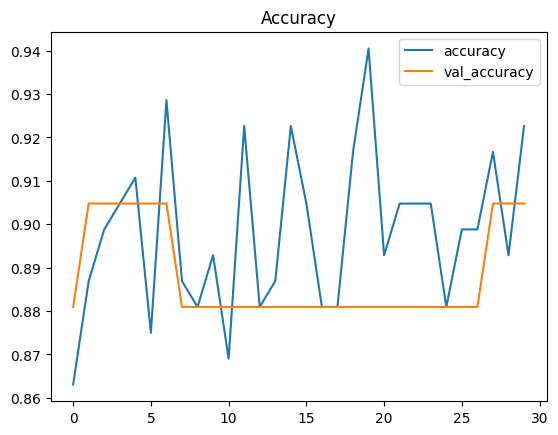

In [50]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

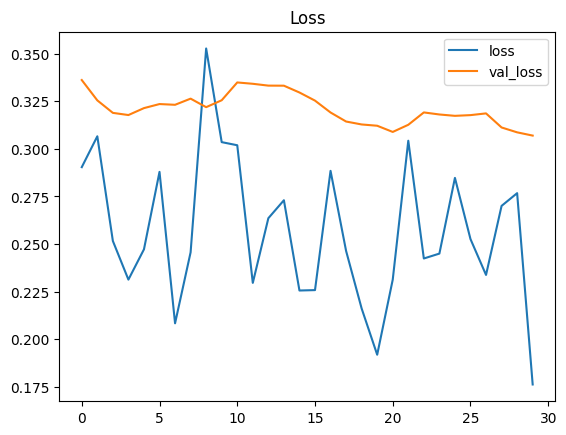

In [51]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [52]:
def prediction_(path_sound):
    data_sound = feature_extract(path_sound)
    X = np.array(data_sound)
    X = X.reshape(1,40)
    pred_ = model.predict(X)
    pred_ = np.argmax(pred_,axis=1)
    pred_class = le.inverse_transform(pred_)
    print("The predicted class is:\033[01m ", pred_class[0],'\033[0m \n')

In [53]:
path_sound = '/content/drive/MyDrive/audio dataset/cats_dogs/test/cats/cat_110.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 29ms/step
The predicted class is:  cat  



In [54]:
path_sound = '/content/drive/MyDrive/audio dataset/cats_dogs/test/dogs/dog_barking_112.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 32ms/step
The predicted class is:  cat  



In [55]:
path_sound = '/content/drive/MyDrive/audio dataset/cats_dogs/test/dogs/dog_barking_45.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 72ms/step
The predicted class is:  dog  

